# Linear Regression

In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def set_default(figsize=(8, 5), dpi=100):
    plt.style.use(["dark_background", "bmh"])
    plt.rc("axes", facecolor="k")
    plt.rc("figure", facecolor="k")
    plt.rc("figure", figsize=figsize, dpi=dpi)


set_default()

In [23]:
# Dataset

x_train = np.linspace(-2, 2, 200)

noise = np.random.normal(
    0,
    0.2,
    x_train.shape,
)  # 100 random numbers with normal distribution

y_train = np.square(x_train) + noise

x_train = x_train.astype(np.float32)
noise = noise.astype(np.float32)
y_train = y_train.astype(np.float32)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [24]:
# Hyper-parameters
input_size = 1
output_size = 1
hidden_size = 10
num_epochs = 1000
learning_rate = 0.01

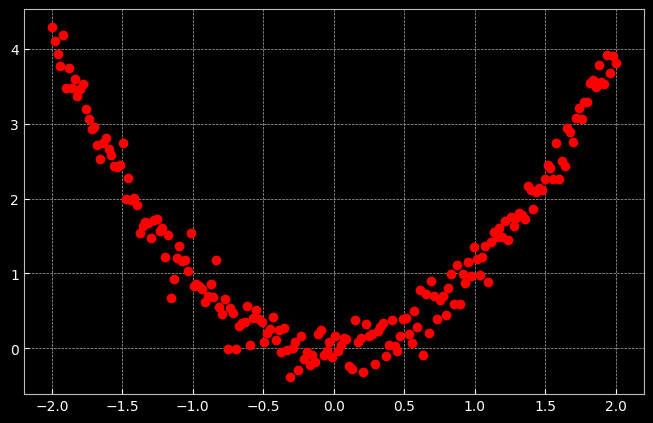

In [25]:
# plot the training data
plt.plot(x_train, y_train, "ro", label="Original data")

In [26]:
# Linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim, bias=True)
        self.ReLU = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        return x

In [27]:
model = LinearRegression(input_size, output_size, hidden_size)

# check the parameters of the linear model
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[-0.2082],
        [-0.6222],
        [ 0.7584],
        [-0.2699],
        [-0.6320],
        [ 0.4389],
        [ 0.6294],
        [-0.9576],
        [ 0.1669],
        [ 0.5968]], requires_grad=True)
fc1.bias Parameter containing:
tensor([ 0.6672,  0.7890, -0.6220, -0.8022, -0.2688, -0.4937, -0.1449,  0.3538,
        -0.8751, -0.4798], requires_grad=True)
fc2.weight Parameter containing:
tensor([[ 0.0809,  0.0463,  0.1154, -0.2243,  0.0415,  0.2840,  0.1964,  0.2626,
          0.3142, -0.1775]], requires_grad=True)
fc2.bias Parameter containing:
tensor([0.3027], requires_grad=True)


In [28]:
# Loss Function
criterion = nn.MSELoss()

# Optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model.forward(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()  # clear the gradients, otherwise they will accumulate
    loss.backward()  # compute the gradients
    optimizer.step()  # update the weights

    # print the loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

# Save the model checkpoint
# torch.save(model.state_dict(), "model.ckpt")

Epoch [5/1000], Loss: 1.5725
Epoch [10/1000], Loss: 1.3599
Epoch [15/1000], Loss: 1.2195
Epoch [20/1000], Loss: 1.1166
Epoch [25/1000], Loss: 1.0343
Epoch [30/1000], Loss: 0.9643
Epoch [35/1000], Loss: 0.9030
Epoch [40/1000], Loss: 0.8484
Epoch [45/1000], Loss: 0.7996
Epoch [50/1000], Loss: 0.7559
Epoch [55/1000], Loss: 0.7167
Epoch [60/1000], Loss: 0.6816
Epoch [65/1000], Loss: 0.6500
Epoch [70/1000], Loss: 0.6212
Epoch [75/1000], Loss: 0.5950
Epoch [80/1000], Loss: 0.5709
Epoch [85/1000], Loss: 0.5485
Epoch [90/1000], Loss: 0.5276
Epoch [95/1000], Loss: 0.5079
Epoch [100/1000], Loss: 0.4894
Epoch [105/1000], Loss: 0.4717
Epoch [110/1000], Loss: 0.4549
Epoch [115/1000], Loss: 0.4388
Epoch [120/1000], Loss: 0.4235
Epoch [125/1000], Loss: 0.4088
Epoch [130/1000], Loss: 0.3947
Epoch [135/1000], Loss: 0.3812
Epoch [140/1000], Loss: 0.3682
Epoch [145/1000], Loss: 0.3558
Epoch [150/1000], Loss: 0.3439
Epoch [155/1000], Loss: 0.3325
Epoch [160/1000], Loss: 0.3216
Epoch [165/1000], Loss: 0.31

fc1.weight Parameter containing:
tensor([[-0.1470],
        [-0.6786],
        [ 1.0518],
        [-0.2699],
        [-0.8866],
        [ 0.8052],
        [ 1.0563],
        [-1.4388],
        [ 0.1669],
        [ 0.5571]], requires_grad=True)
fc1.bias Parameter containing:
tensor([ 0.7092,  0.7402, -0.6303, -0.8022, -0.5943, -0.4517, -0.0787, -0.3586,
        -0.8751, -0.5247], requires_grad=True)
fc2.weight Parameter containing:
tensor([[-0.2086,  0.0404,  0.7456, -0.2243,  0.8186,  0.7044,  0.8631,  1.1075,
          0.3142,  0.1770]], requires_grad=True)
fc2.bias Parameter containing:
tensor([-0.0822], requires_grad=True)


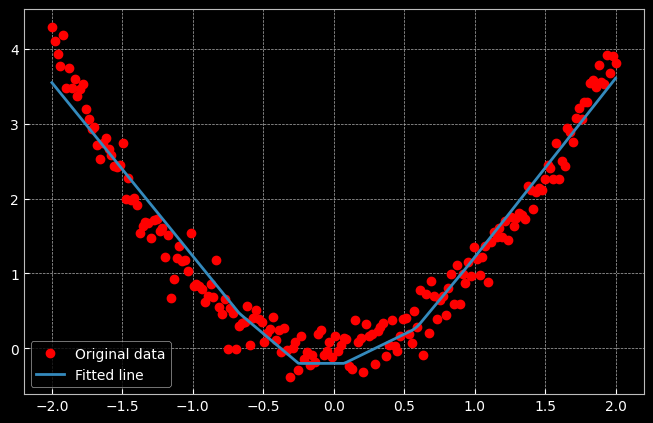

In [30]:
# Plot the graph
inputs = torch.from_numpy(x_train)

predicted = model.forward(inputs).detach().numpy()
for name, param in model.named_parameters():
    print(name, param)
plt.plot(x_train, y_train, "ro", label="Original data")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()